In [21]:
import sys

sys.path.append("../")

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# import data.drawings.make_tasks as drawing_tasks
from src.analysis_utilities import SynthesisExperimentAnalyzer
from src.config_builder import ExperimentType

In [24]:
sns.set_theme(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(12, 8)})

In [25]:
%config InlineBackend.figure_format = 'retina'

In [26]:
EXPERIMENT_NAME = "runs_human_2"

COMPUTE_LIKELIHOODS = True

FIGURES_DIR = os.path.join("figures", EXPERIMENT_NAME)
os.makedirs(FIGURES_DIR, exist_ok=True)

In [31]:
analyzer = SynthesisExperimentAnalyzer(
    experiment_name=EXPERIMENT_NAME,
    # experiment_types=["baseline_dreamcoder", "gpt_solver", "gpt_solver_stitch", "gpt_solver_stitch_namer", "gpt_solver_stitch_namer_hybrid_dsl", "gpt_solver_stitch_namer_search"],
    experiment_types = ["gpt_solver"],
    allow_incomplete_results=True,
    compute_likelihoods=COMPUTE_LIKELIHOODS,
    batch_size = 96,
    seeds = [111, 222, 333],
)

Experiment directory: ../experiments_iterative/outputs/runs_human_2
Available domains: ['clevr_human']


# Tasks solved vs. LAPS iteration

In [32]:
df_results = analyzer.get_synthesis_summary()
df_results = analyzer.format_dataframe_camera(df_results)

In [33]:
df_results

,domain,Model,seed,iteration,split,n_solved,Tasks solved (%)
0,CLEVR (human language),LLM Solver,111,0,test,22,21.359223
4,CLEVR (human language),LLM Solver,111,3,test,57,55.339806
8,CLEVR (human language),LLM Solver,111,6,test,69,66.990291
12,CLEVR (human language),LLM Solver,111,9,test,67,65.048544
16,CLEVR (human language),LLM Solver,111,12,test,73,70.873786
...,...,...,...,...,...,...,...
59,CLEVR (human language),LLM Solver,333,11,train,148,77.486911
61,CLEVR (human language),LLM Solver,333,12,train,148,77.486911
62,CLEVR (human language),LLM Solver,333,13,train,148,77.486911
63,CLEVR (human language),LLM Solver,333,14,train,148,77.486911


IndexError: index 1 is out of bounds for axis 0 with size 1

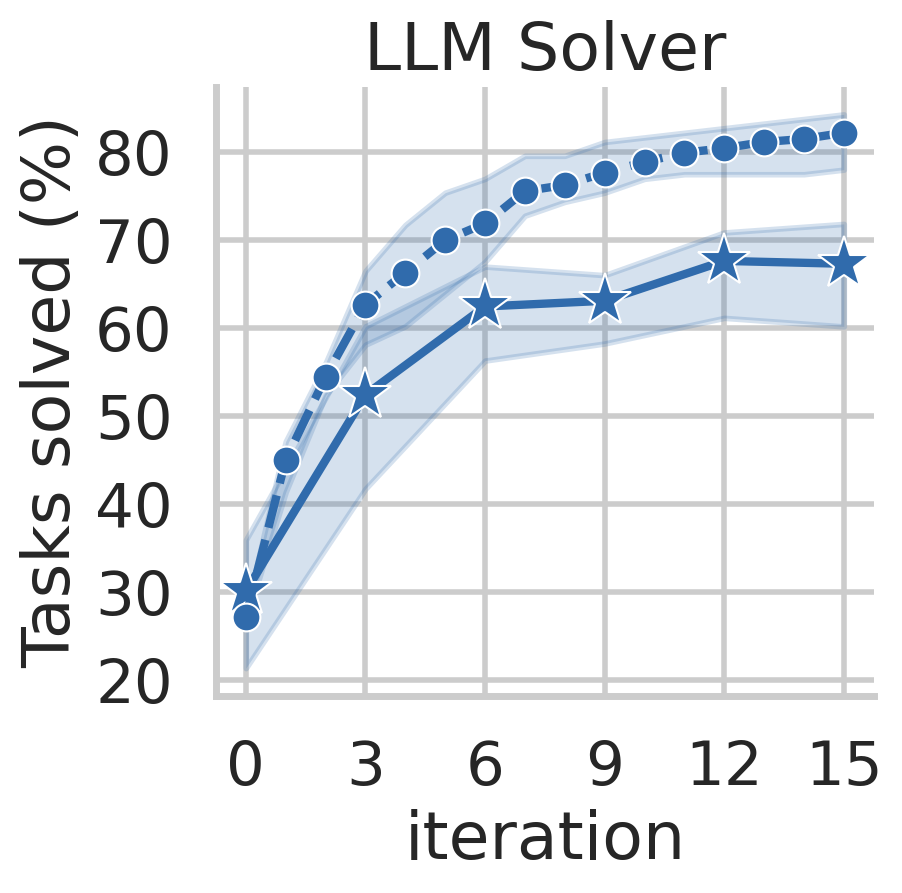

In [34]:
with sns.plotting_context("poster", font_scale=1):
    g = sns.relplot(
        data=df_results,
        kind="line",
        row="domain",
        col=analyzer.COL_NAMES_CAMERA["experiment_type"],
        x="iteration",
        y=analyzer.COL_NAMES_CAMERA["percent_solved"],
        hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
        style="split",
        # markers=[".", "*"],
        markers=["*", "."],
        markersize=20,
        # errorbar="se",
        # col_order=["train", "test"],
        row_order = [d for d in list(analyzer.DOMAIN_NAMES_CAMERA.values()) if d in df_results.domain.unique()],
        facet_kws={'sharex': False, 'sharey': True, 'margin_titles': False},
        palette=analyzer.EXPERIMENT_TYPES_PALETTE,
        legend=False,
    )
    for subplot in g.axes[0]:
        subplot.set_title(subplot.title.get_text().split(" = ")[-1])
        
    for ax in g.axes[0]:
        ax.set_xticks(np.arange(0, 16, 3))
    for ax in g.axes[1]:
        ax.set_xticks(np.arange(0, 10, 3))
    for ax in g.axes[2]:
        ax.set_xticks(np.arange(0, 10, 3))
        
    # sns.move_legend(g, "lower center")
        
    # plt.savefig(os.path.join(FIGURES_DIR, "main_results.pdf"), dpi=300, bbox_inches="tight")

# Main results table

In [69]:
df_results_test = df_results.query("split == 'test'")
grouped = df_results_test.groupby([
    "domain",
    analyzer.COL_NAMES_CAMERA["experiment_type"],
    "seed",
], as_index=False)

def _get_final_iteration(group):
    final_iteration = group["iteration"].max().item()
    return group[group["iteration"] == final_iteration]

df_results_test = grouped.apply(_get_final_iteration).reset_index(drop=True)
df_results_test

,domain,Model,seed,iteration,split,n_solved,Tasks solved (%)
0,REGEX,DreamCoder,111,15,test,228,45.600000
1,REGEX,DreamCoder,222,15,test,213,42.600000
2,REGEX,DreamCoder,333,15,test,218,43.600000
3,REGEX,LLM Solver,111,15,test,350,70.000000
4,REGEX,LLM Solver,222,15,test,450,90.000000
5,REGEX,LLM Solver,333,15,test,342,68.400000
6,REGEX,LLM Solver (+ Stitch),111,15,test,249,49.800000
7,REGEX,LLM Solver (+ Stitch),222,15,test,252,50.400000
8,REGEX,LLM Solver (+ Stitch),333,15,test,297,59.400000
9,REGEX,LILO,111,15,test,319,63.800000


In [70]:
df_metrics_test = df_results_test.groupby([
    "domain",
    analyzer.COL_NAMES_CAMERA["experiment_type"],
]) \
[[
    analyzer.COL_NAMES_CAMERA["percent_solved"]
]] \
.agg(["mean", "max", "std"])

df_metrics_test = df_metrics_test.reindex(list(analyzer.DOMAIN_NAMES_CAMERA.values()), level=0)
df_metrics_test

Tasks solved (%)                      
                                         mean        max        std
domain Model                                                       
REGEX  DreamCoder                   43.933333  45.600000   1.527525
       LLM Solver                   76.133333  90.000000  12.035503
       LLM Solver (+ Stitch)        53.200000  59.400000   5.377732
       LILO                         62.933333  63.800000   1.501111
       LILO (+ Hybrid DSL)          64.533333  69.600000   7.759725
       LILO (+ Search)              77.066667  93.200000  14.144021
CLEVR  DreamCoder                   94.498382  97.087379   2.443312
       LLM Solver                   88.673139  90.291262   1.483034
       LLM Solver (+ Stitch)        85.760518  93.203883   9.724906
       LILO                         88.025890  94.174757   8.257185
       LILO (+ Hybrid DSL)          90.938511  94.174757   3.409597
       LILO (+ Search)              96.763754  99.029126   3.120923
LOGO   DreamCoder                   28.528529  36.936937  13.790946
       LLM Solver                   32.132132  41.441441   8.074672
       LLM Solver (+ Stitch)        21.021021  45.045045  20.883290
       LILO                         21.021021  30.630631   9.463034
       LILO (+ Hybrid DSL)          32.432432  40.540541   7.036261
       LILO (+ Search)              48.948949  73.873874  22.147020

In [71]:
# Reorder column levels
df_metrics_test_final = df_metrics_test.reset_index().pivot(index="Model", columns="domain").reorder_levels(order=[0, 2, 1], axis="columns")

# Reorder columns
multiindex = df_metrics_test_final.columns
multiindex = multiindex.reindex(list(analyzer.DOMAIN_NAMES_CAMERA.values()), level=1)[0]
multiindex = multiindex.reindex(["max", "mean", "std"], level=2)[0]

df_metrics_test_final = df_metrics_test_final.reindex(columns=multiindex)
df_metrics_test_final.columns.names = [None, None, None]

# Reorder rows
experiment_types = [x for x in analyzer.EXPERIMENT_TYPES_CAMERA.values() if x in df_metrics_test_final.index]
df_metrics_test_final = df_metrics_test_final.reindex(experiment_types)

# Remove 'Model'
df_metrics_test_final.index.name = None

# Round numbers
df_metrics_test_final = df_metrics_test_final.round(2)

# Output to LaTeX
df_metrics_test_final.to_latex("main_results_table.tex")

df_metrics_test_final

Tasks solved (%)                                    \
                                 REGEX                CLEVR                
                                   max   mean    std    max   mean   std   
DreamCoder                        45.6  43.93   1.53  97.09  94.50  2.44   
LLM Solver                        90.0  76.13  12.04  90.29  88.67  1.48   
LLM Solver (+ Stitch)             59.4  53.20   5.38  93.20  85.76  9.72   
LILO                              63.8  62.93   1.50  94.17  88.03  8.26   
LILO (+ Hybrid DSL)               69.6  64.53   7.76  94.17  90.94  3.41   
LILO (+ Search)                   93.2  77.07  14.14  99.03  96.76  3.12   

                                            
                        LOGO                
                         max   mean    std  
DreamCoder             36.94  28.53  13.79  
LLM Solver             41.44  32.13   8.07  
LLM Solver (+ Stitch)  45.05  21.02  20.88  
LILO                   30.63  21.02   9.46  
LILO (+ Hybrid DSL)    40.54  32.43   7.04  
LILO (+ Search)        73.87  48.95  22.15

# Runtime metrics

In [72]:
df_runtime = analyzer.get_runtime_metrics()
df_runtime.groupby(["domain", "experiment_type", "model_type", "model_fn", "split"]).time_elapsed.agg("mean")

domain  experiment_type                     model_type           model_fn                      split
clevr   baseline_dreamcoder                 amortized_synthesis  infer_programs_for_tasks      test      627.410529
                                                                                               train     626.392419
                                                                 optimize_model_for_frontiers  train     639.112597
                                            grammar              infer_programs_for_tasks      train     602.131269
        gpt_solver                          llm_solver           infer_programs_for_tasks      test      754.704399
                                                                                               train     717.473114
        gpt_solver_stitch                   llm_solver           infer_programs_for_tasks      test      599.403698
                                                                                       

In [73]:
df_infer_programs = df_runtime.query("model_fn == 'infer_programs_for_tasks'").query("model_type != 'grammar'")

# Remove outliers
df_infer_programs = df_infer_programs.query("time_elapsed > 300.0")


df_infer_programs

,curr_iteration,model_type,model_fn,split,time_start,time_end,time_elapsed,domain,experiment_type,seed,iteration
1,0,amortized_synthesis,infer_programs_for_tasks,train,2023-04-28 22:24:19.571785472+00:00,2023-04-28 22:41:05.207317504+00:00,1005.635532,re2,baseline_dreamcoder,111,0
2,0,amortized_synthesis,infer_programs_for_tasks,test,2023-04-28 22:41:05.210528768+00:00,2023-04-29 00:08:40.567719168+00:00,5255.357190,re2,baseline_dreamcoder,111,0
4,1,amortized_synthesis,infer_programs_for_tasks,train,2023-04-29 00:13:29.896112384+00:00,2023-04-29 00:30:25.199052032+00:00,1015.302940,re2,baseline_dreamcoder,111,1
6,2,amortized_synthesis,infer_programs_for_tasks,train,2023-04-29 00:34:49.866311680+00:00,2023-04-29 00:51:45.249414912+00:00,1015.383103,re2,baseline_dreamcoder,111,2
8,3,amortized_synthesis,infer_programs_for_tasks,train,2023-04-29 00:56:06.303152384+00:00,2023-04-29 01:13:01.237486592+00:00,1014.934334,re2,baseline_dreamcoder,111,3
...,...,...,...,...,...,...,...,...,...,...,...
1589,8,amortized_synthesis,infer_programs_for_tasks,train,2023-05-09 15:56:04.268782336+00:00,2023-05-09 16:26:23.548738560+00:00,1819.279956,logo,gpt_solver_stitch_namer_search,333,8
1591,9,llm_solver,infer_programs_for_tasks,train,2023-05-09 19:46:34.041540352+00:00,2023-05-09 19:55:45.109794304+00:00,551.068254,logo,gpt_solver_stitch_namer_search,333,9
1593,9,amortized_synthesis,infer_programs_for_tasks,train,2023-05-09 20:02:59.027871488+00:00,2023-05-09 20:33:13.493095424+00:00,1814.465224,logo,gpt_solver_stitch_namer_search,333,9
1594,9,llm_solver,infer_programs_for_tasks,test,2023-05-09 20:33:13.494556160+00:00,2023-05-09 20:46:42.105857024+00:00,808.611301,logo,gpt_solver_stitch_namer_search,333,9


In [74]:
analyzer.format_dataframe_camera(df_infer_programs)

,curr_iteration,model_type,model_fn,split,time_start,time_end,time_elapsed,domain,Model,seed,iteration
2,0,amortized_synthesis,infer_programs_for_tasks,test,2023-04-28 22:41:05.210528768+00:00,2023-04-29 00:08:40.567719168+00:00,5255.357190,REGEX,DreamCoder,111,0
9,3,amortized_synthesis,infer_programs_for_tasks,test,2023-04-29 01:13:01.245009920+00:00,2023-04-29 02:29:59.210052352+00:00,4617.965042,REGEX,DreamCoder,111,3
16,6,amortized_synthesis,infer_programs_for_tasks,test,2023-04-29 03:33:58.367144192+00:00,2023-04-29 04:41:22.761961472+00:00,4044.394817,REGEX,DreamCoder,111,6
23,9,amortized_synthesis,infer_programs_for_tasks,test,2023-04-29 05:46:13.461995008+00:00,2023-04-29 06:52:22.957523456+00:00,3969.495528,REGEX,DreamCoder,111,9
30,12,amortized_synthesis,infer_programs_for_tasks,test,2023-04-29 07:57:26.422527488+00:00,2023-04-29 08:59:17.856697088+00:00,3711.434170,REGEX,DreamCoder,111,12
...,...,...,...,...,...,...,...,...,...,...,...
1585,7,amortized_synthesis,infer_programs_for_tasks,train,2023-05-09 14:55:19.712157952+00:00,2023-05-09 15:25:40.473774592+00:00,1820.761617,LOGO,LILO (+ Search),333,7
1587,8,llm_solver,infer_programs_for_tasks,train,2023-05-09 15:27:17.377997824+00:00,2023-05-09 15:36:32.525122048+00:00,555.147124,LOGO,LILO (+ Search),333,8
1589,8,amortized_synthesis,infer_programs_for_tasks,train,2023-05-09 15:56:04.268782336+00:00,2023-05-09 16:26:23.548738560+00:00,1819.279956,LOGO,LILO (+ Search),333,8
1591,9,llm_solver,infer_programs_for_tasks,train,2023-05-09 19:46:34.041540352+00:00,2023-05-09 19:55:45.109794304+00:00,551.068254,LOGO,LILO (+ Search),333,9


## Wall clock time figure

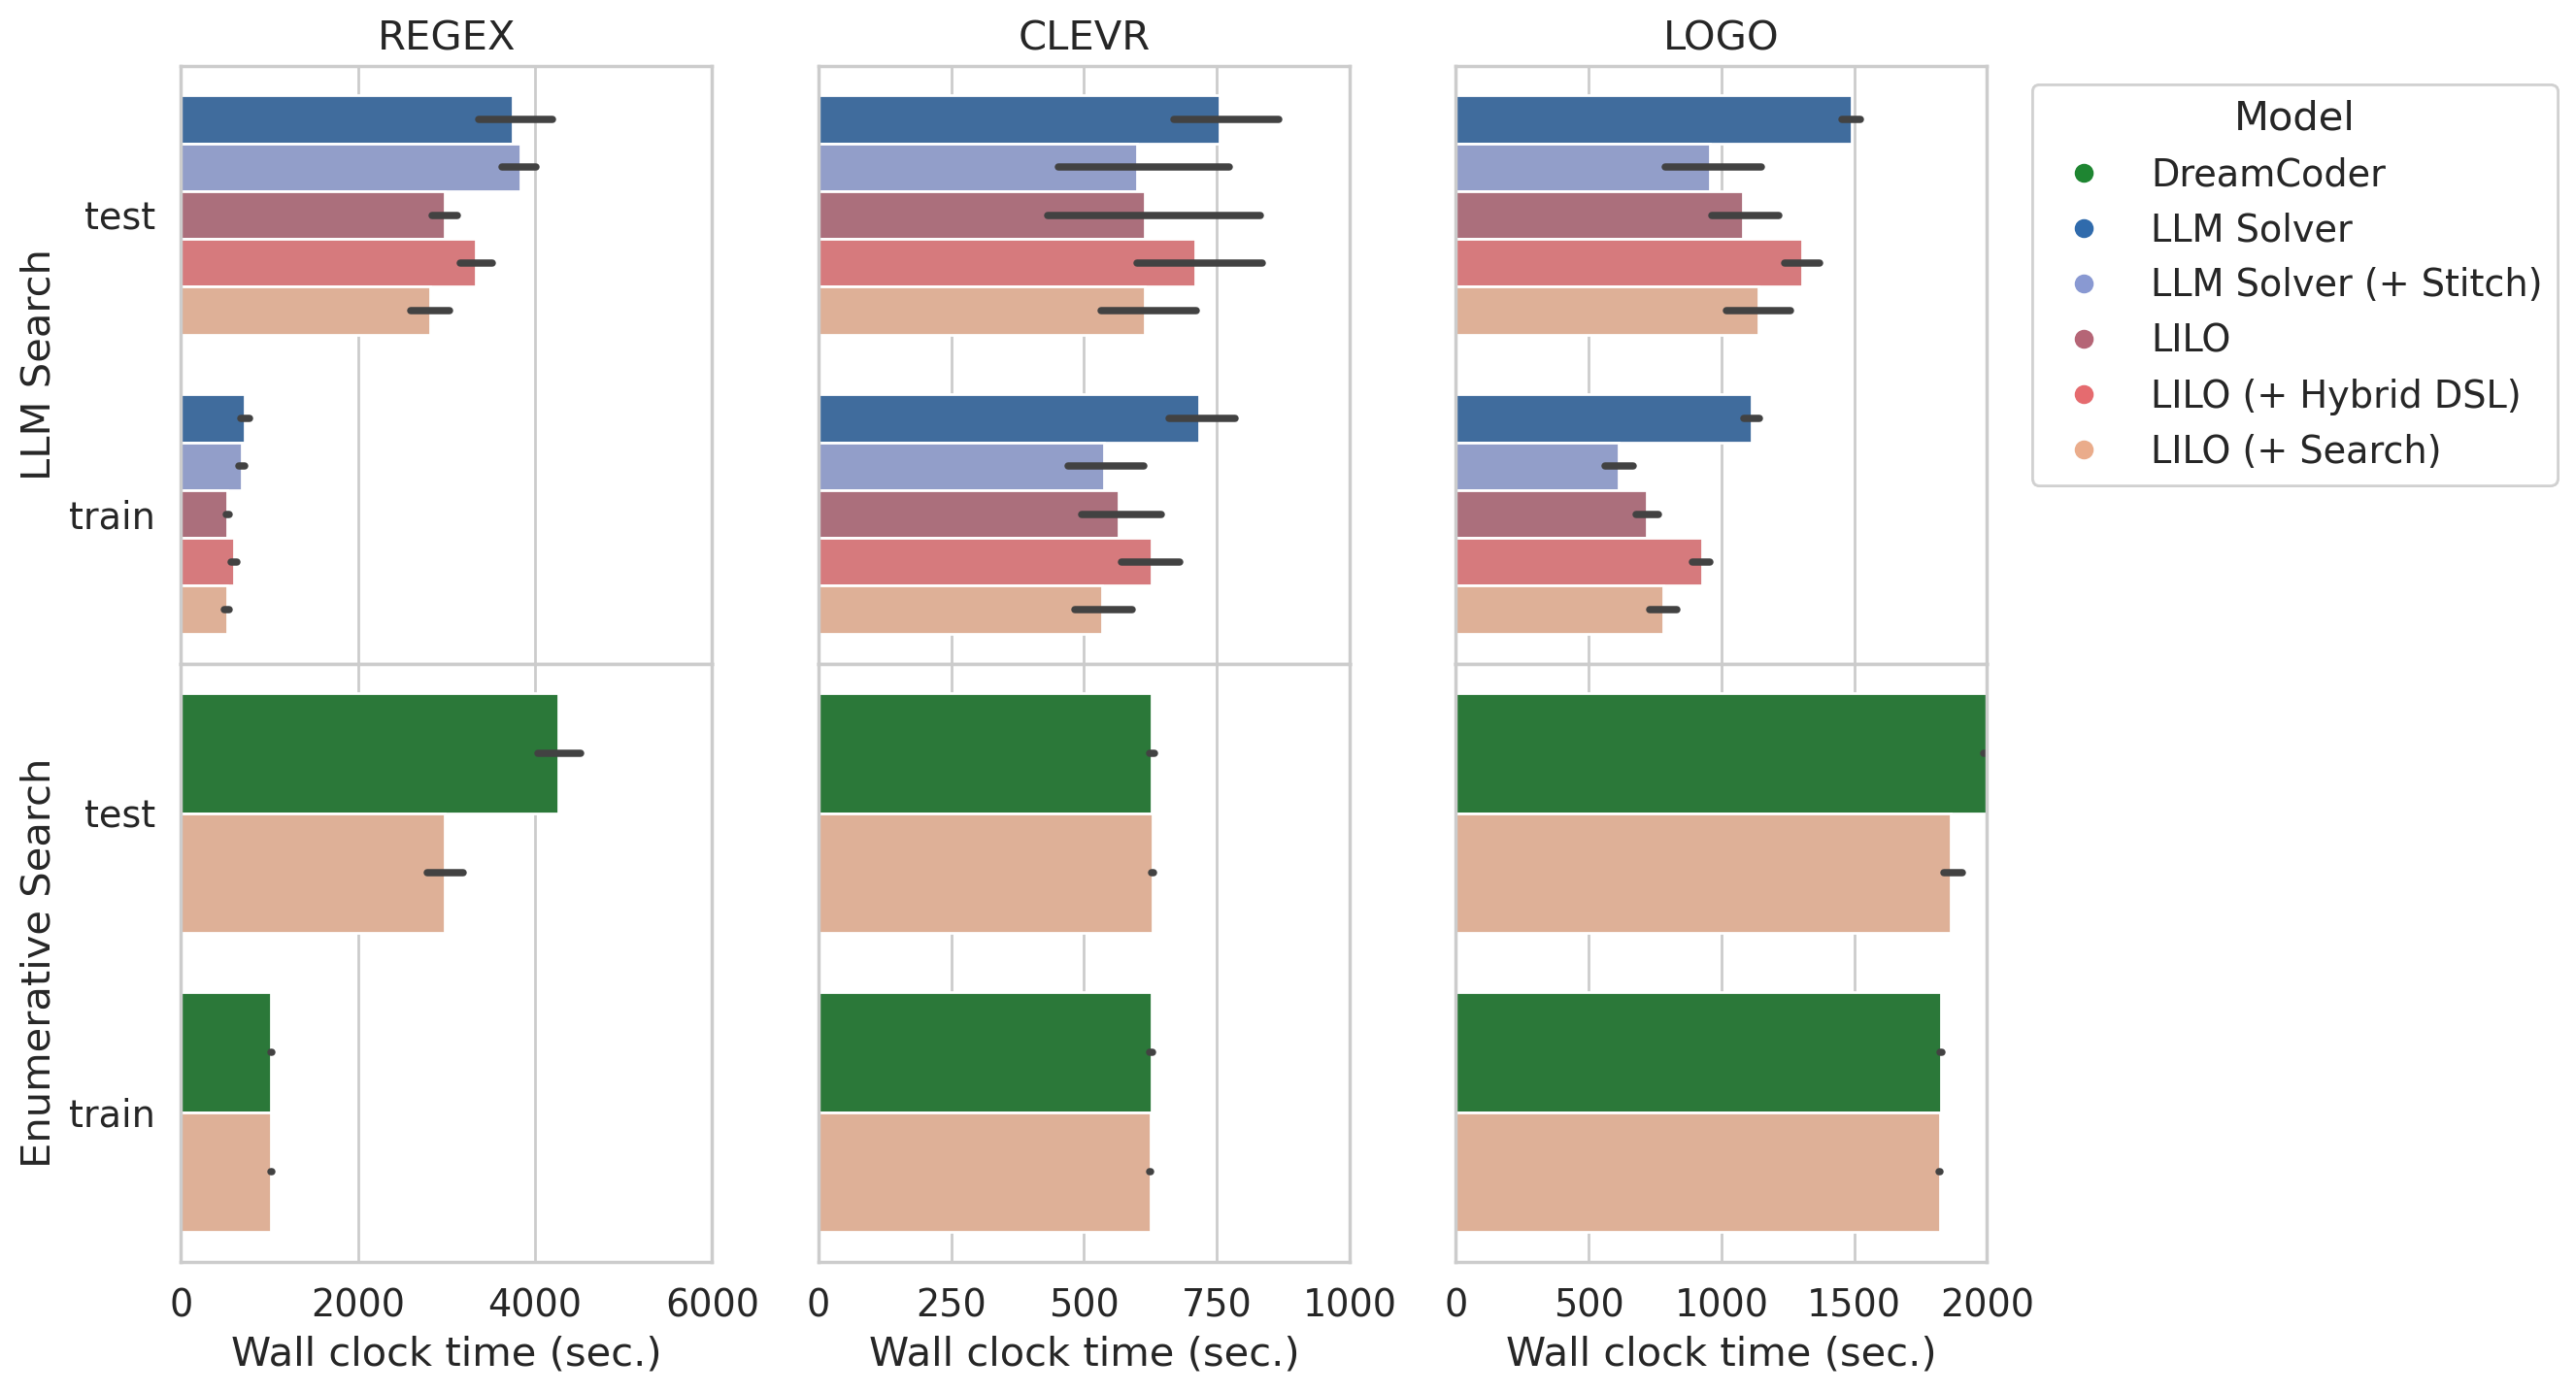

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# First plot
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False)  # Create subplots with shared x-axis
plt.subplots_adjust(hspace=0.)  # Adjust vertical spacing between subplots

for i, domain in enumerate(analyzer.DOMAIN_NAMES_CAMERA.keys()):

    # Plot 1
    ax1 = sns.barplot(
        data=analyzer.format_dataframe_camera(df_infer_programs.query("model_type == 'llm_solver'").query(f"domain == '{domain}'")), 
        ax=axes[0][i],  # Specify the first subplot
        y="split",
        x="time_elapsed", 
        hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
        palette=analyzer.EXPERIMENT_TYPES_PALETTE,
    )
    ax1.set(xlabel=None)
    ax1.set_xticks(ticks=ax1.get_xticks(), labels=[])
    
    ax1.legend_.remove()
    
    ax1.set_title(analyzer.DOMAIN_NAMES_CAMERA[domain])

    # Plot 2
    ax2 = sns.barplot(
        data=analyzer.format_dataframe_camera(df_infer_programs.query("model_type == 'amortized_synthesis'").query(f"domain == '{domain}'")), 
        ax=axes[1][i],  # Specify the second subplot
        y="split",
        x="time_elapsed", 
        hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
        palette=analyzer.EXPERIMENT_TYPES_PALETTE,
    )
    
    ax2.set(xlabel="Wall clock time (sec.)", xlim=ax1.get_xlim())
    
    ax2.legend_.remove()
    
    
    
    # Remove y-axis labels and ticks for plots except the first row
    if i==0:
        ax1.set_ylabel("LLM Search")
        ax2.set_ylabel("Enumerative Search")
    else:
        ax1.set(ylabel=None)
        ax2.set(ylabel=None)
        ax1.set_yticks([])
        ax2.set_yticks([])

# Create a legend outside the figure
legend_labels = list(analyzer.EXPERIMENT_TYPES_CAMERA.values())[1:]
legend_handles = [plt.Line2D([], [], color=color, marker='o', linestyle='') for color in list(analyzer.EXPERIMENT_TYPES_PALETTE.values())[1:]]
legend = ax1.legend(legend_handles, legend_labels, title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the legend to the figure
fig.add_artist(legend)

# Save figure
plt.savefig(os.path.join(FIGURES_DIR, "wall_clock_time.pdf"), dpi=300, bbox_inches="tight")

# Show the plots
plt.show()

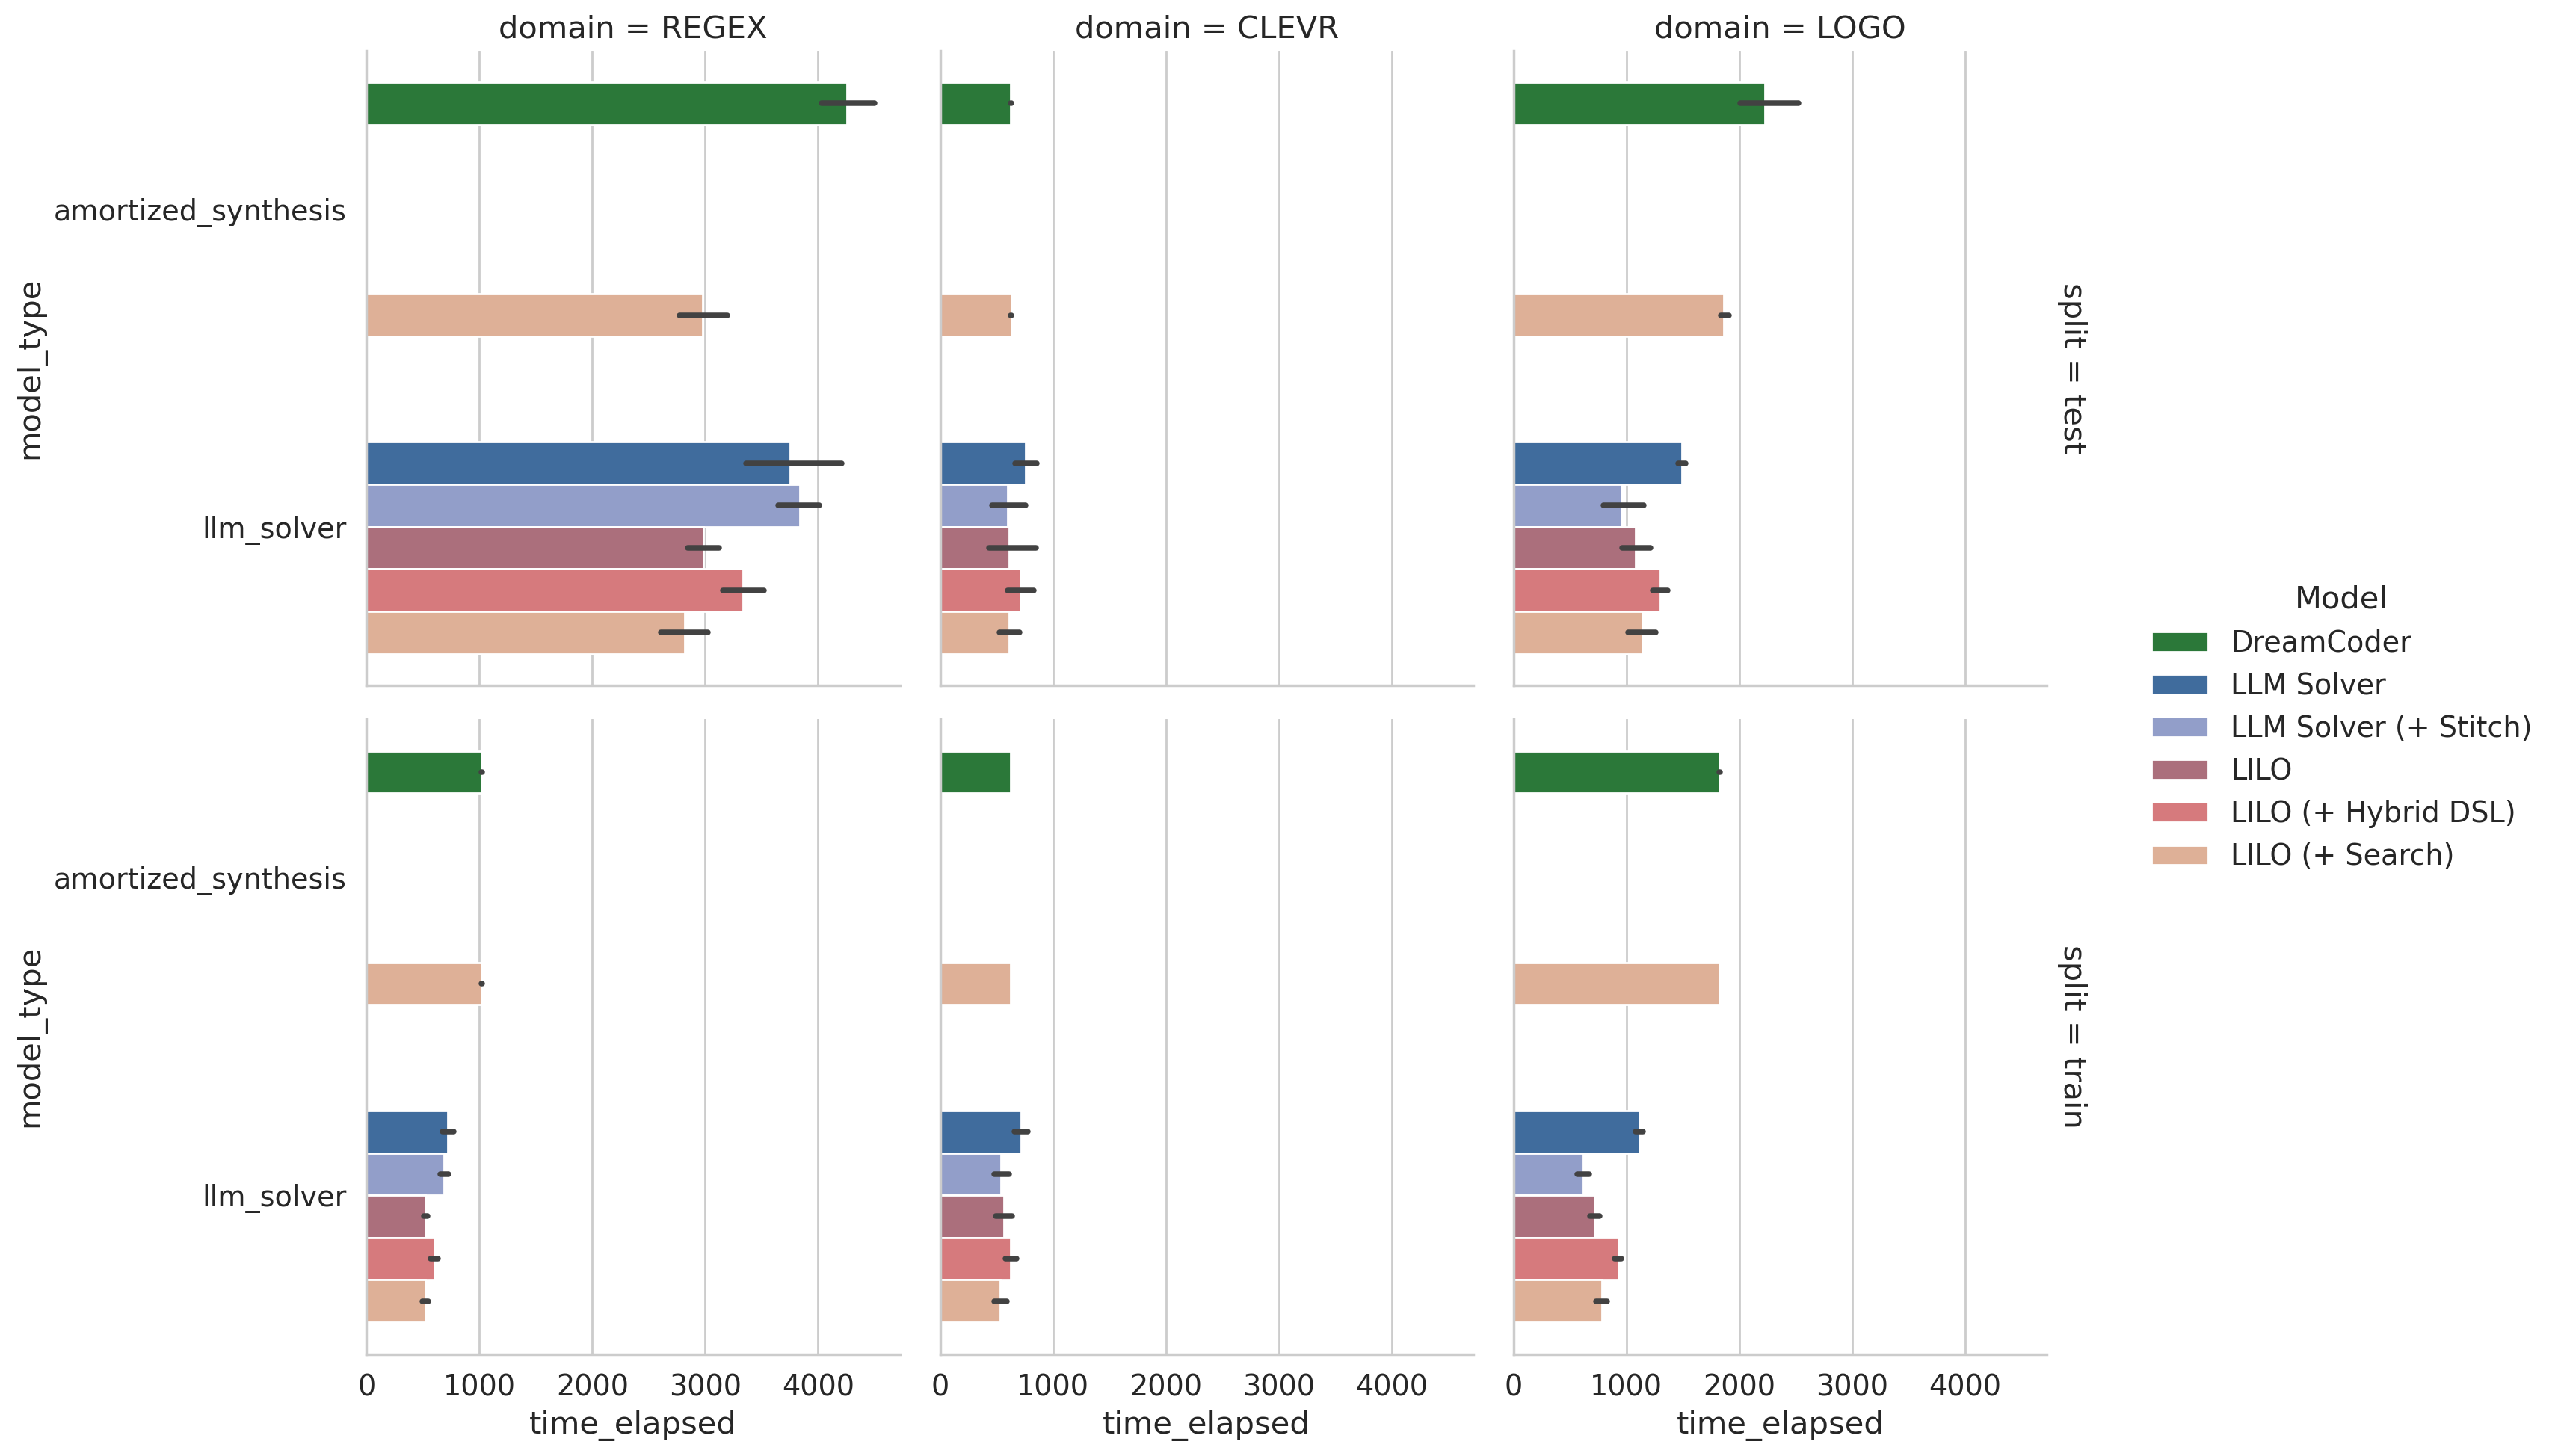

In [76]:
sns.catplot(
    data=analyzer.format_dataframe_camera(df_infer_programs), 
    kind="bar",
    col="domain",
    row="split",
    y="model_type",
    x="time_elapsed", 
    hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
    palette=analyzer.EXPERIMENT_TYPES_PALETTE,
    margin_titles=True,
    sharex=True,
    # facet_kws=dict(sharex=True,)
    
)

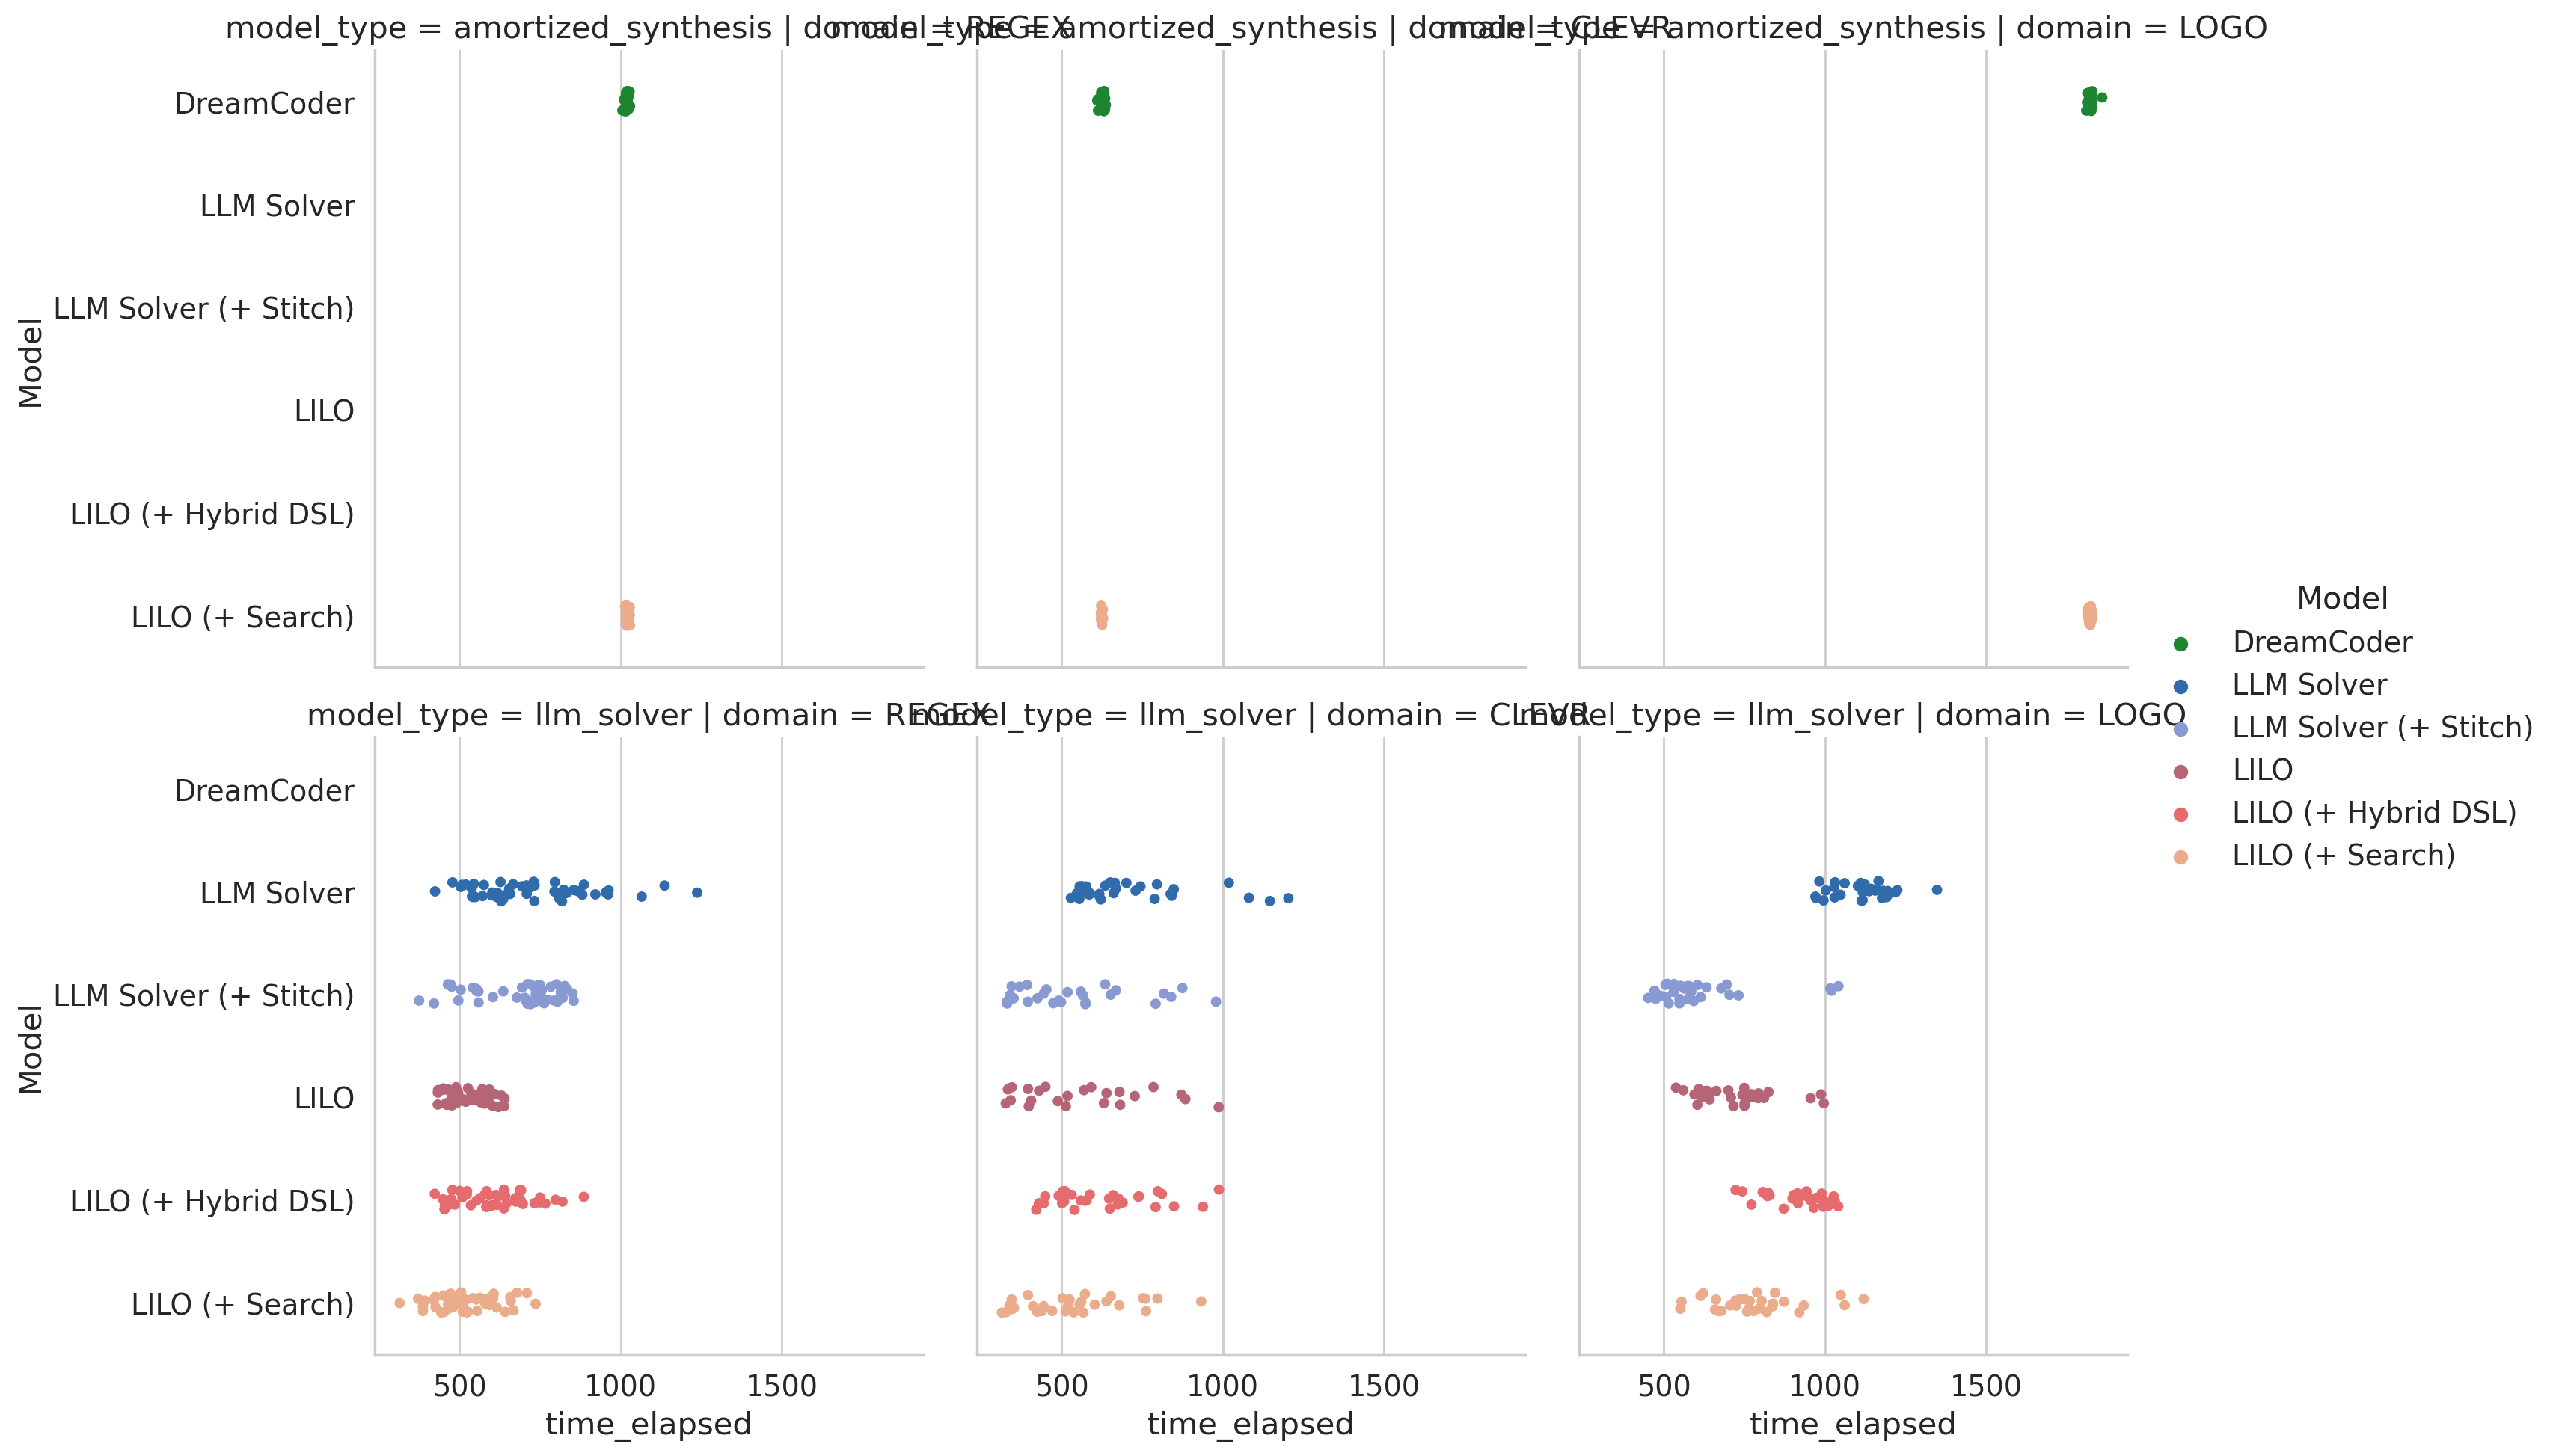

In [77]:
sns.catplot(
    data=analyzer.format_dataframe_camera(df_infer_programs.query("split == 'train'")), 
    kind="strip",
    col="domain",
    row="model_type",
    y=analyzer.COL_NAMES_CAMERA["experiment_type"],
    x="time_elapsed", 
    hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
    palette=analyzer.EXPERIMENT_TYPES_PALETTE,
    margin_titles=True,
    sharex=True,
    # facet_kws=dict(sharex=True,)
    
)

# Number of queries

In [78]:
# Cache these results since they take a long time to load
TOKEN_USAGE_PATH = "token_usage.csv"

if not os.path.exists(TOKEN_USAGE_PATH):
    df_token_usage = analyzer.get_gpt_solver_results()
    df_token_usage.to_csv("token_usage.csv", index=False)
else:
    df_token_usage = pd.read_csv(TOKEN_USAGE_PATH)

In [79]:
df_token_usage

,prompt_tokens,completion_tokens,total_tokens,domain,experiment_type,seed,iteration,split,task_id,query_i
0,1460,206,1666,re2,gpt_solver,111,0,train,re2_train_489_if_there_is_any_letter_consonant...,0
1,1463,195,1658,re2,gpt_solver,111,0,train,re2_train_489_if_there_is_any_letter_consonant...,1
2,1462,232,1694,re2,gpt_solver,111,0,train,re2_train_489_if_there_is_any_letter_consonant...,2
3,1460,183,1643,re2,gpt_solver,111,0,train,re2_train_489_if_there_is_any_letter_consonant...,3
4,1461,184,1645,re2,gpt_solver,111,0,train,re2_train_153_if_there_is_consonant_consonant_...,0
...,...,...,...,...,...,...,...,...,...,...
279039,3882,338,4220,logo,gpt_solver_stitch_namer_search,333,9,test,6 sided snowflake with a short space and a sho...,3
279040,3935,151,4086,logo,gpt_solver_stitch_namer_search,333,9,test,5 sided snowflake with 2 small 5 gon s as arms,0
279041,3830,222,4052,logo,gpt_solver_stitch_namer_search,333,9,test,5 sided snowflake with 2 small 5 gon s as arms,1
279042,3767,374,4141,logo,gpt_solver_stitch_namer_search,333,9,test,5 sided snowflake with 2 small 5 gon s as arms,2


In [80]:
df_token_usage_by_iteration = df_token_usage.groupby([
    "domain",
    "experiment_type",
    "split",
    "seed",
    "iteration"
]) \
[["prompt_tokens", "completion_tokens", "total_tokens"]] \
.sum().reset_index()

df_token_usage_by_iteration

,domain,experiment_type,split,seed,iteration,prompt_tokens,completion_tokens,total_tokens
0,clevr,gpt_solver,test,111,0,1290850,87360,1378210
1,clevr,gpt_solver,test,111,3,770686,76143,846829
2,clevr,gpt_solver,test,111,6,660547,82898,743445
3,clevr,gpt_solver,test,111,9,582015,78061,660076
4,clevr,gpt_solver,test,222,0,1161136,70582,1231718
...,...,...,...,...,...,...,...,...
745,re2,gpt_solver_stitch_namer_search,train,333,11,916229,37347,953576
746,re2,gpt_solver_stitch_namer_search,train,333,12,749141,29384,778525
747,re2,gpt_solver_stitch_namer_search,train,333,13,787686,34425,822111
748,re2,gpt_solver_stitch_namer_search,train,333,14,880818,36147,916965


In [81]:
analyzer.format_dataframe_camera(df_token_usage_by_iteration.query("split == 'train'"))

,domain,Model,split,seed,iteration,prompt_tokens,completion_tokens,total_tokens
438,REGEX,LLM Solver,train,111,0,420499,58326,478825
439,REGEX,LLM Solver,train,111,1,763250,67007,830257
440,REGEX,LLM Solver,train,111,2,960253,72747,1033000
441,REGEX,LLM Solver,train,111,3,984600,77153,1061753
442,REGEX,LLM Solver,train,111,4,839914,70389,910303
...,...,...,...,...,...,...,...,...
415,LOGO,LILO (+ Search),train,333,5,1162170,78290,1240460
416,LOGO,LILO (+ Search),train,333,6,1047793,60812,1108605
417,LOGO,LILO (+ Search),train,333,7,1055473,67768,1123241
418,LOGO,LILO (+ Search),train,333,8,791713,40193,831906


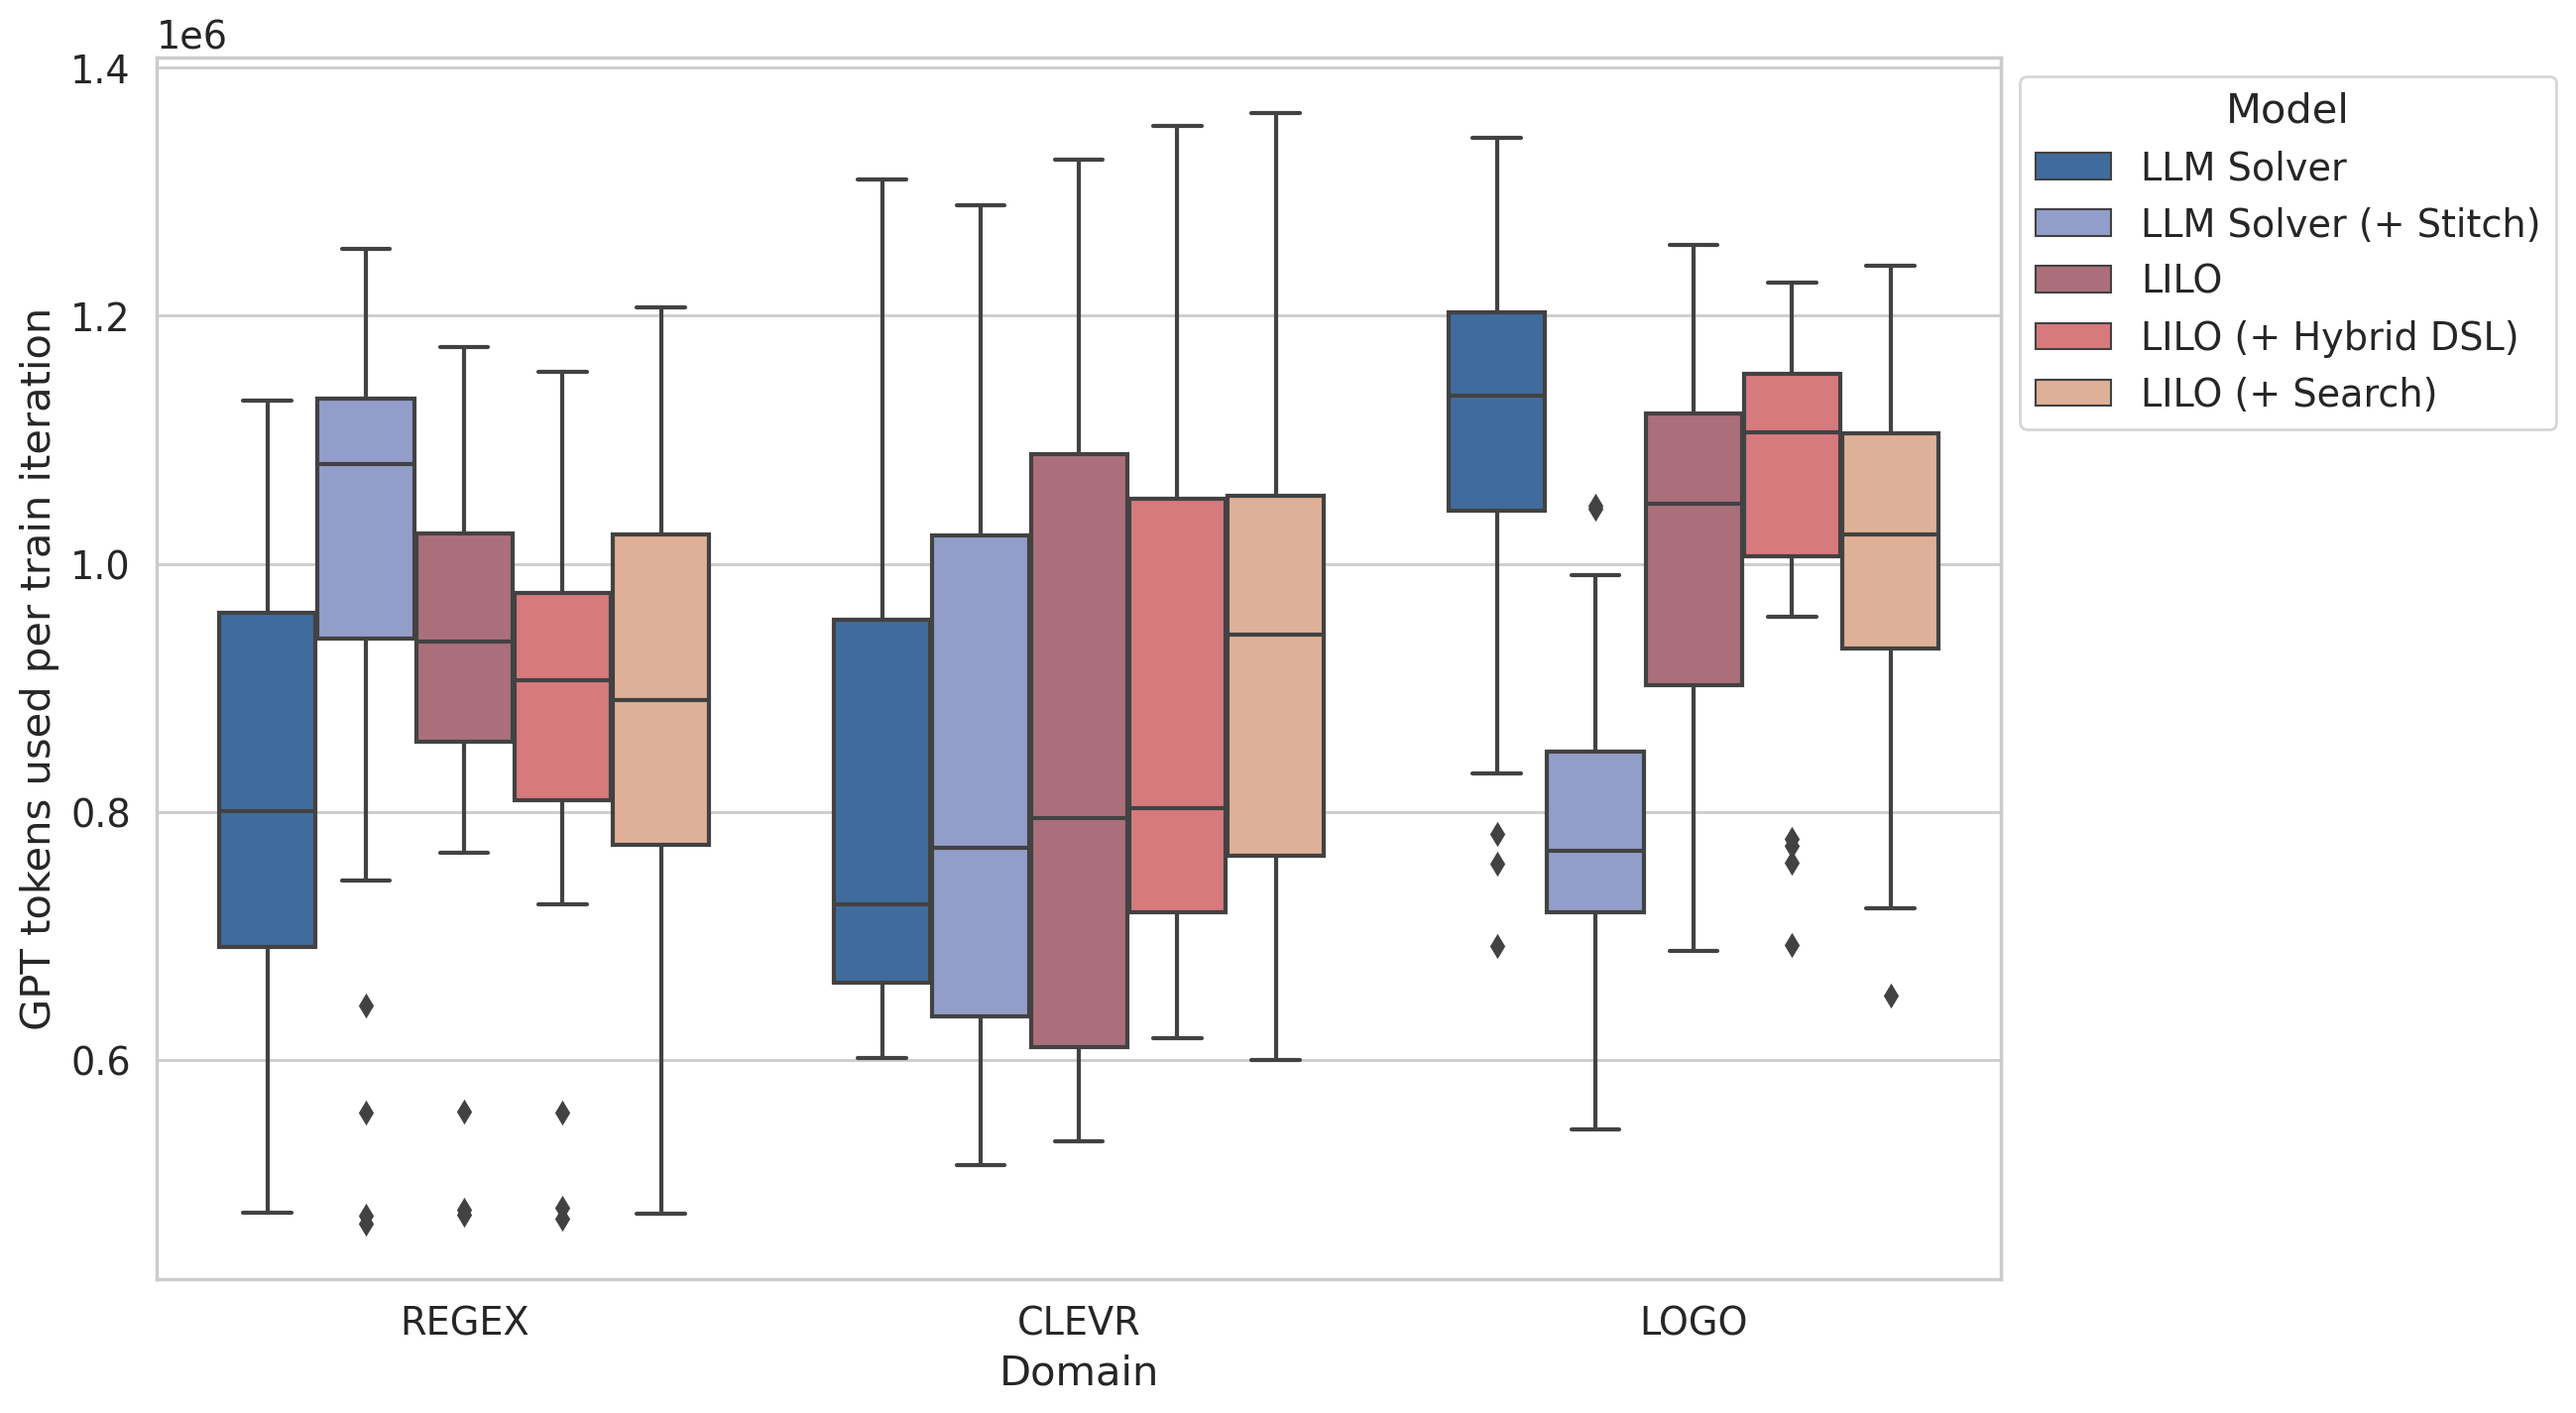

In [88]:
ax = sns.boxplot(
    data=analyzer.format_dataframe_camera(df_token_usage_by_iteration.query("split == 'train'")), 
    y="total_tokens",
    x="domain",
    hue=analyzer.COL_NAMES_CAMERA["experiment_type"],
    palette=analyzer.EXPERIMENT_TYPES_PALETTE,
)
ax.set_ylabel("GPT tokens used per train iteration")
ax.set_xlabel("Domain")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig(os.path.join(FIGURES_DIR, "token_usage.pdf"), dpi=300, bbox_inches="tight")

# Dollar cost table

In [83]:
df_token_usage_stats = df_token_usage.query("split == 'train'").groupby([
    "domain",
    "experiment_type",
    "seed",
    "iteration"
]) \
[["total_tokens"]] \
.sum().reset_index()

df_token_usage_stats = df_token_usage_stats.groupby([
    "domain",
    "experiment_type",
]) \
[["total_tokens"]] \
.agg(["mean", "std"]).reset_index()

df_token_usage_stats[("cost", "mean")] = (0.002 / 1000) * df_token_usage_stats["total_tokens"]["mean"]
df_token_usage_stats[("cost", "std")] = (0.002 / 1000) * df_token_usage_stats["total_tokens"]["std"]

# Drop total tokens
df_token_usage_stats = df_token_usage_stats[["domain", "experiment_type", "cost"]]

df_token_usage_stats

domain                     experiment_type      cost          
                                                   mean       std
0   clevr                          gpt_solver  1.662261  0.435939
1   clevr                   gpt_solver_stitch  1.662688  0.471845
2   clevr             gpt_solver_stitch_namer  1.701005  0.521042
3   clevr  gpt_solver_stitch_namer_hybrid_dsl  1.779008  0.427517
4   clevr      gpt_solver_stitch_namer_search  1.865970  0.418131
5    logo                          gpt_solver  2.193114  0.317582
6    logo                   gpt_solver_stitch  1.585315  0.240222
7    logo             gpt_solver_stitch_namer  2.029652  0.310121
8    logo  gpt_solver_stitch_namer_hybrid_dsl  2.118082  0.289716
9    logo      gpt_solver_stitch_namer_search  2.011322  0.297350
10    re2                          gpt_solver  1.646017  0.349959
11    re2                   gpt_solver_stitch  2.038254  0.392807
12    re2             gpt_solver_stitch_namer  1.856264  0.303634
13    re2  gpt_solver_stitch_namer_hybrid_dsl  1.781908  0.300268
14    re2      gpt_solver_stitch_namer_search  1.766567  0.376823

In [84]:
# Convert to table
df_token_usage_stats_table = analyzer.format_dataframe_camera(df_token_usage_stats)


df_token_usage_stats_table = df_token_usage_stats_table.pivot(index=analyzer.COL_NAMES_CAMERA["experiment_type"], columns="domain")

df_token_usage_stats_table = df_token_usage_stats_table.reorder_levels(order=[0, 2, 1], axis="columns")

multiindex = df_token_usage_stats_table.columns
multiindex = multiindex.reindex(list(analyzer.DOMAIN_NAMES_CAMERA.values()), level=1)[0]
multiindex = multiindex.reindex(["mean", "std"], level=2)[0]

df_token_usage_stats_table = df_token_usage_stats_table.reindex(columns=multiindex)
df_token_usage_stats_table.columns.names = [None, None, None]

# Reorder rows
experiment_types = [x for x in analyzer.EXPERIMENT_TYPES_CAMERA.values() if x in df_token_usage_stats_table.index]
df_token_usage_stats_table = df_token_usage_stats_table.reindex(experiment_types)

# Remove 'Model'
df_token_usage_stats_table.index.name = None

# Round numbers
df_token_usage_stats_table = df_token_usage_stats_table.round(2)

# Drop 'cost'
# df_token_usage_stats_table = df_token_usage_stats_table.droplevel(level=0, axis=1)

# Format each entry as a dollar value
df_token_usage_stats_table = df_token_usage_stats_table.applymap(lambda x: '${:,.2f}'.format(x) if isinstance(x, (int, float)) else x)


# Output to LaTeX
df_token_usage_stats_table.to_latex(os.path.join(FIGURES_DIR, "token_cost_table.tex"))

df_token_usage_stats_table

cost                                   
                       REGEX         CLEVR          LOGO       
                        mean    std   mean    std   mean    std
LLM Solver             $1.65  $0.35  $1.66  $0.44  $2.19  $0.32
LLM Solver (+ Stitch)  $2.04  $0.39  $1.66  $0.47  $1.59  $0.24
LILO                   $1.86  $0.30  $1.70  $0.52  $2.03  $0.31
LILO (+ Hybrid DSL)    $1.78  $0.30  $1.78  $0.43  $2.12  $0.29
LILO (+ Search)        $1.77  $0.38  $1.87  $0.42  $2.01  $0.30

In [85]:
df_search_stats = df_infer_programs \
.query("experiment_type == 'baseline_dreamcoder' or experiment_type == 'gpt_solver_stitch_namer_search'") \
.query("split == 'train'") \
.query("model_type == 'amortized_synthesis'") \
[["domain", "experiment_type", "seed", "iteration", "time_elapsed"]]

df_search_stats = df_search_stats.groupby([
    "domain",
    "experiment_type",
]) \
[["time_elapsed"]] \
.agg(["mean", "std"]).reset_index()

df_search_stats[("cost", "mean")] = (4.08 / (60*60)) * df_search_stats["time_elapsed"]["mean"]
df_search_stats[("cost", "std")] = (4.08 / (60*60)) * df_search_stats["time_elapsed"]["std"]

# Drop elapsed time
df_search_stats = df_search_stats[["domain", "experiment_type", "cost"]]


df_search_stats

domain                 experiment_type      cost          
                                              mean       std
0  clevr             baseline_dreamcoder  0.709911  0.007381
1  clevr  gpt_solver_stitch_namer_search  0.708299  0.002152
2   logo             baseline_dreamcoder  2.068901  0.009300
3   logo  gpt_solver_stitch_namer_search  2.065819  0.004783
4    re2             baseline_dreamcoder  1.156587  0.005212
5    re2  gpt_solver_stitch_namer_search  1.156620  0.004268

In [86]:
# Convert to table
df_search_stats_table = analyzer.format_dataframe_camera(df_search_stats)


df_search_stats_table = df_search_stats_table.pivot(index=analyzer.COL_NAMES_CAMERA["experiment_type"], columns="domain")

df_search_stats_table = df_search_stats_table.reorder_levels(order=[0, 2, 1], axis="columns")

multiindex = df_search_stats_table.columns
multiindex = multiindex.reindex(list(analyzer.DOMAIN_NAMES_CAMERA.values()), level=1)[0]
multiindex = multiindex.reindex(["mean", "std"], level=2)[0]

df_search_stats_table = df_search_stats_table.reindex(columns=multiindex)
df_search_stats_table.columns.names = [None, None, None]

# Reorder rows
experiment_types = [x for x in analyzer.EXPERIMENT_TYPES_CAMERA.values() if x in df_search_stats_table.index]
df_search_stats_table = df_search_stats_table.reindex(experiment_types)

# Remove 'Model'
df_search_stats_table.index.name = None

# Round numbers
df_search_stats_table = df_search_stats_table.round(2)

# Drop 'cost'
# df_search_stats_table = df_search_stats_table.droplevel(level=0, axis=1)

# Format each entry as a dollar value
df_search_stats_table = df_search_stats_table.applymap(lambda x: '${:,.2f}'.format(x) if isinstance(x, (int, float)) else x)


# Output to LaTeX
df_search_stats_table.to_latex(os.path.join(FIGURES_DIR, "search_cost_table.tex"))

df_search_stats_table

cost                                   
                 REGEX         CLEVR          LOGO       
                  mean    std   mean    std   mean    std
DreamCoder       $1.16  $0.01  $0.71  $0.01  $2.07  $0.01
LILO (+ Search)  $1.16  $0.00  $0.71  $0.00  $2.07  $0.00

In [87]:
df_cost_table = pd.concat([df_token_usage_stats_table, df_search_stats_table], keys=['LLM Search', 'Enumerative Search'])

# Output to LaTeX
df_cost_table.to_latex(os.path.join(FIGURES_DIR, "cost_table.tex"))

df_cost_table

cost                              \
                                          REGEX         CLEVR          LOGO   
                                           mean    std   mean    std   mean   
LLM Search         LLM Solver             $1.65  $0.35  $1.66  $0.44  $2.19   
                   LLM Solver (+ Stitch)  $2.04  $0.39  $1.66  $0.47  $1.59   
                   LILO                   $1.86  $0.30  $1.70  $0.52  $2.03   
                   LILO (+ Hybrid DSL)    $1.78  $0.30  $1.78  $0.43  $2.12   
                   LILO (+ Search)        $1.77  $0.38  $1.87  $0.42  $2.01   
Enumerative Search DreamCoder             $1.16  $0.01  $0.71  $0.01  $2.07   
                   LILO (+ Search)        $1.16  $0.00  $0.71  $0.00  $2.07   

                                                 
                                                 
                                            std  
LLM Search         LLM Solver             $0.32  
                   LLM Solver (+ Stitch)  $0.24  
                   LILO                   $0.31  
                   LILO (+ Hybrid DSL)    $0.29  
                   LILO (+ Search)        $0.30  
Enumerative Search DreamCoder             $0.01  
                   LILO (+ Search)        $0.00